In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import random

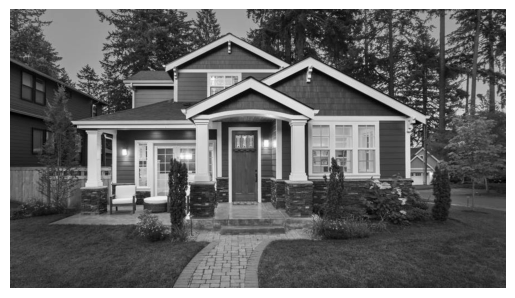

In [41]:
img = cv2.imread('house.jpg' , 0)
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.show()

In [42]:
h , w = img.shape

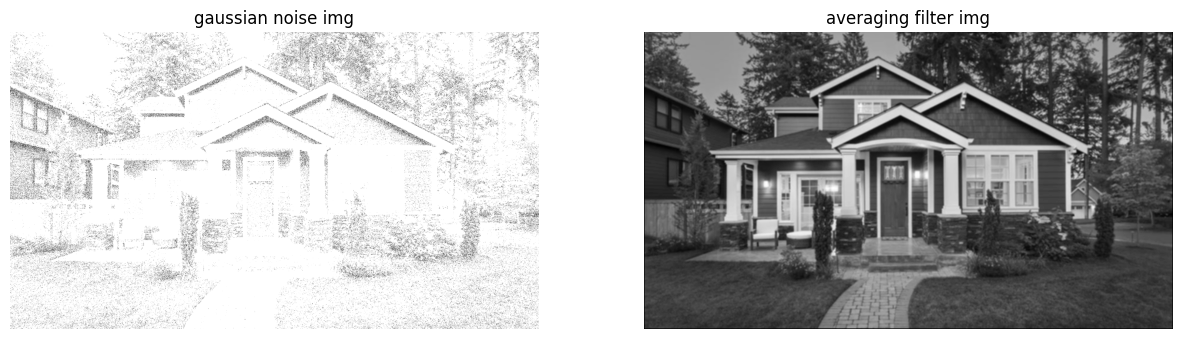

In [43]:
#adding gaussian noise
arr = np.zeros(img.shape, dtype= np.uint8)
mu = 200
sig = 20

cv2.randn(arr , mu , sig)
add_gn = cv2.add(img , arr)

#removing gaussian noise using averaging filter
mask = np.ones([3,3])
mask = mask/9

rem_gn = np.zeros(img.shape)

for i in range(1, h-1):
    for j in range(1, w-1):
        temp = (img[i-1, j-1]*mask[0][0] + img[i, j-1]*mask[1][0] + img[i+1, j-1]*mask[2][0] + 
                img[i-1, j]*mask[0][1] +   img[i, j]*mask[1][1] +   img[i+1, j]*mask[2][1] +   
                img[i-1, j+1]*mask[0][2] + img[i, j+1]*mask[1][2] + img[i+1, j+1]*mask[2][2] )
        
        rem_gn[i][j] = temp

#comparing images
fig = plt.figure(figsize = (15, 10))
rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(add_gn , cmap = 'gray')
plt.axis('off')
plt.title('gaussian noise img')


fig.add_subplot(rows, cols, 2)
plt.imshow(rem_gn, cmap = 'gray')
plt.axis('off')
plt.title('averaging filter img')
plt.show()

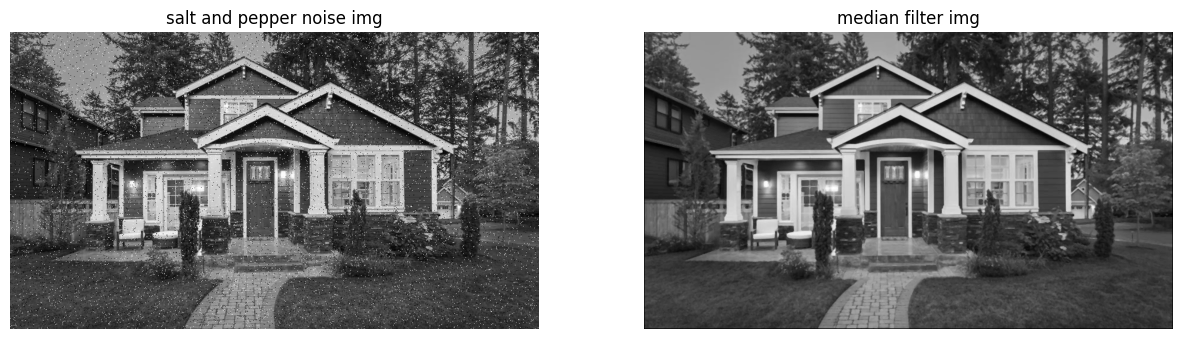

In [44]:
#adding salt noise

pix = random.randint(300,10000)
add_spn = cv2.imread('house.jpg' , 0)

for i in range(pix):
    x = random.randint(0 , h-1)
    y = random.randint(0 , w-1)
    
    add_spn[x][y] = 255
    
#adding pepper noise

pix = random.randint(300,10000)
add_pn = np.zeros(img.shape)

for i in range(pix):
    x = random.randint(0 , h-1)
    y = random.randint(0 , w-1)
    
    add_spn[x][y] = 0
    
#removing salt and pepper noise using median filter

rem_spn = np.zeros([h,w])

for i in range(1, h-1):
    for j in range(1, w-1):
        temp = [img[i-1, j-1] , img[i, j-1] , img[i+1, j-1] , 
                img[i-1, j] ,  img[i, j] ,   img[i+1, j] ,   
                img[i-1, j+1] , img[i, j+1] , img[i+1, j+1] ]
        
        temp = sorted(temp)
        rem_spn[i][j] = temp[4]
        
#comparing images
fig = plt.figure(figsize = (15, 10))
rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(add_spn , cmap = 'gray')
plt.axis('off')
plt.title('salt and pepper noise img')

fig.add_subplot(rows, cols, 2)
plt.imshow(rem_spn, cmap = 'gray')
plt.axis('off')
plt.title('median filter img')

plt.show()